# Parameter recovery of the hierarchical DDM with starting point bias

In [8]:
from rlssm.random.random_DDM import simulate_hier_ddm
from rlssm.model.models_DDM import DDModel

## Simulate group data

In [9]:
data = simulate_hier_ddm(n_trials=200, 
                         n_participants=10,
                         gen_mu_drift=.6, gen_sd_drift=.1,
                         gen_mu_threshold=.5, gen_sd_threshold=.1,
                         gen_mu_ndt=0, gen_sd_ndt=.01,
                         gen_mu_rel_sp=.1, gen_sd_rel_sp=.01)

In [10]:
data.head()

threshold      ndt     drift    rel_sp       rt  accuracy
participant trial                                                           
1           1       0.856968  0.69136  0.560748  0.528504  1.33036       1.0
            2       0.856968  0.69136  0.560748  0.528504  1.01736       1.0
            3       0.856968  0.69136  0.560748  0.528504  1.12036       1.0
            4       0.856968  0.69136  0.560748  0.528504  0.81236       1.0
            5       0.856968  0.69136  0.560748  0.528504  0.94836       1.0

In [11]:
data.groupby('participant').describe()[['rt', 'accuracy']]

rt                                                    \
             count      mean       std       min       25%       50%   
participant                                                            
1            200.0  0.886955  0.149759  0.708360  0.776110  0.833360   
2            200.0  0.996003  0.223616  0.711263  0.822763  0.941763   
3            200.0  0.933400  0.220667  0.708170  0.791920  0.864670   
4            200.0  0.936922  0.204043  0.723397  0.794397  0.868897   
5            200.0  0.891589  0.149670  0.716739  0.782489  0.860739   
6            200.0  0.938973  0.191488  0.716778  0.801528  0.886778   
7            200.0  0.947892  0.204146  0.721537  0.805287  0.896037   
8            200.0  0.942487  0.202270  0.713652  0.809652  0.895152   
9            200.0  0.943863  0.181200  0.743198  0.817698  0.880698   
10           200.0  0.909838  0.191812  0.711408  0.781158  0.849908   

                                accuracy                                       \
                  75%       max    count   mean       std  min  25%  50%  75%   
participant                                                                     
1            0.977860  1.486360    200.0  0.655  0.476561  0.0  0.0  1.0  1.0   
2            1.126013  1.970263    200.0  0.655  0.476561  0.0  0.0  1.0  1.0   
3            0.994920  2.023170    200.0  0.710  0.454901  0.0  0.0  1.0  1.0   
4            1.002647  1.965397    200.0  0.595  0.492124  0.0  0.0  1.0  1.0   
5            0.947739  1.700739    200.0  0.670  0.471393  0.0  0.0  1.0  1.0   
6            1.006278  1.803778    200.0  0.660  0.474898  0.0  0.0  1.0  1.0   
7            1.013537  1.896537    200.0  0.680  0.467647  0.0  0.0  1.0  1.0   
8            0.989902  1.793652    200.0  0.710  0.454901  0.0  0.0  1.0  1.0   
9            1.011198  1.629198    200.0  0.690  0.463654  0.0  0.0  1.0  1.0   
10           0.995658  2.103408    200.0  0.710  0.454901  0.0  0.0  1.0  1.0   

                  
             max  
participant       
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  
10           1.0

## Initialize the model

In [12]:
model = DDModel(hierarchical_levels = 2, starting_point_bias=True)

## Fit

In [13]:
# sampling parameters
n_warmup = 500
n_sampling = 2500
n_chains = 2
n_thin = 1

In [14]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

17:28:20 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
threshold_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
rel_sp_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

17:36:23 - cmdstanpy - INFO - CmdStan done processing.
17:36:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 0.741263, but must be greater than nondecision time = 3.83459 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM_bias.stan', line 86, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 0.81236, but must be greater than nondecision time = 0.925898 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM_bias.stan', line 86, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 0.714408, but must be greater than nondecision time = 0.716191 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM_bias.stan', line 86, column 1 to column 54)
	Exception: wiener_lpdf: Random variable  = 1.33036, but must be greater than nondecision time = 5.70367 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/DDM/hierDDM_bias.stan', line 86, column 1 to column 54)



Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 5000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 5000 iterations ended with a divergence (0.0%)


### get Rhat

In [15]:
model_fit.rhat.describe()

,rhat
count,14093.000000
mean,0.999899
std,0.000225
min,0.999606
25%,0.999723
50%,0.999842
75%,0.999998
max,1.003130


### calculate wAIC

In [16]:
model_fit.waic

{'lppd': -118.12441198167284,
 'p_waic': 24.589047786623894,
 'waic': 285.42691953659346,
 'waic_se': 90.608211766535}

## Posteriors

In [17]:
model_fit.samples.describe()

,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,transf_mu_rel_sp,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],drift_sbj[5],drift_sbj[6],...,rel_sp_sbj[1],rel_sp_sbj[2],rel_sp_sbj[3],rel_sp_sbj[4],rel_sp_sbj[5],rel_sp_sbj[6],rel_sp_sbj[7],rel_sp_sbj[8],rel_sp_sbj[9],rel_sp_sbj[10]
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.589049,0.999804,0.694482,0.533768,0.592093,0.549548,0.634618,0.499611,0.593798,0.570988,...,0.524106,0.522754,0.529269,0.527970,0.543342,0.533816,0.542101,0.534828,0.531394,0.548872
std,0.067046,0.025471,0.004456,0.010327,0.095989,0.093728,0.100758,0.119823,0.098199,0.096001,...,0.015258,0.016027,0.014309,0.015027,0.016366,0.014529,0.015959,0.014501,0.014423,0.018479
min,0.338118,0.875079,0.669527,0.474416,0.127374,0.117056,0.249590,-0.043133,0.144250,0.113549,...,0.448062,0.428891,0.458273,0.456054,0.489001,0.471102,0.489480,0.466946,0.466145,0.499528
25%,0.544705,0.983710,0.691748,0.527299,0.532889,0.494416,0.568221,0.431402,0.535588,0.513929,...,0.515047,0.513145,0.520539,0.519217,0.532017,0.524863,0.531237,0.525973,0.523063,0.535513
50%,0.589376,0.999062,0.694457,0.533629,0.590355,0.555326,0.626404,0.520010,0.592024,0.574528,...,0.525327,0.524805,0.530150,0.529093,0.541301,0.533845,0.540534,0.534412,0.532201,0.546295
75%,0.633768,1.015353,0.697127,0.540210,0.649512,0.613757,0.691086,0.584602,0.651433,0.632327,...,0.534996,0.533912,0.538659,0.537750,0.553345,0.542641,0.551672,0.543394,0.540318,0.560275
max,0.911971,1.124670,0.715601,0.588685,0.960057,0.892719,1.143610,0.812977,1.074580,0.960479,...,0.573821,0.573211,0.580618,0.582792,0.651745,0.594286,0.609741,0.592600,0.591705,0.650637


In [18]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

Here we plot the estimated posterior distributions against the generating parameters, to see whether the model parameters are recovering well:

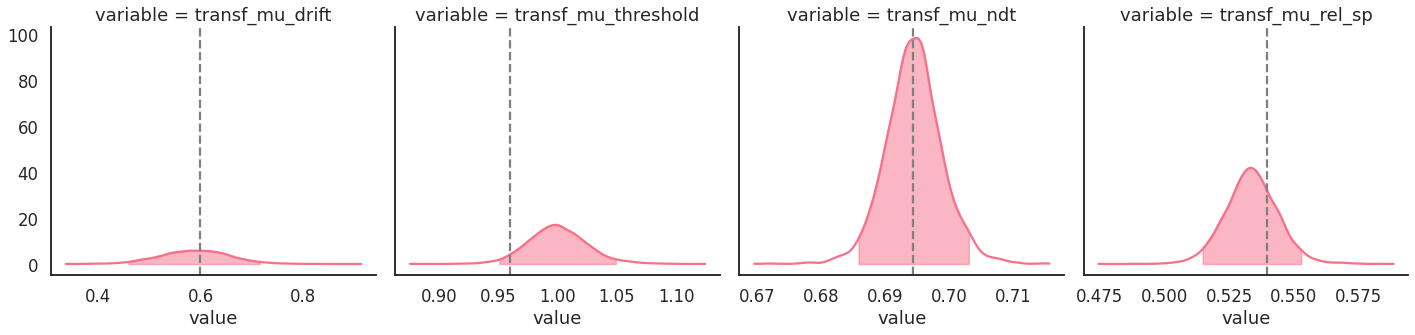

In [19]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

for i, ax in enumerate(g.axes.flatten()):
    ax.axvline(data[['drift', 'threshold', 'ndt', 'rel_sp']].mean().values[i], color='grey', linestyle='--')